<a href="https://colab.research.google.com/github/cnagineni23/My-First-Project/blob/main/DS_MINOR_JUNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Classifying Iris DataSet Using Support Vector Machines<h1>

In [114]:
#SVC classification

# Importing useful libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Take the Data and Create Data Frame
load the data using pandas library

In [115]:
#importing the dataset and creating a dataframe

df=pd.read_csv("/content/Iris.csv")

In [116]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#Data Visualization For Overview

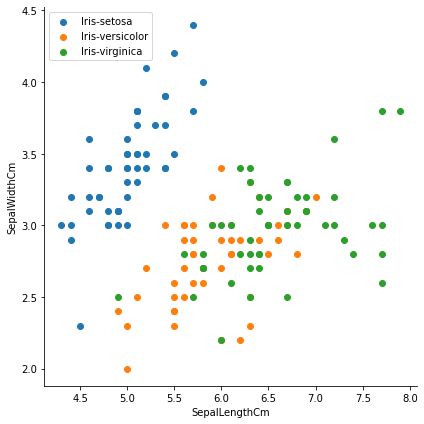

In [117]:
#plotting the dataset(SepalWidth vs SepalLength)
sns.FacetGrid(df,hue="Species",height=6).map(plt.scatter,'SepalLengthCm','SepalWidthCm')
plt.legend(loc='upper left')
plt.show()

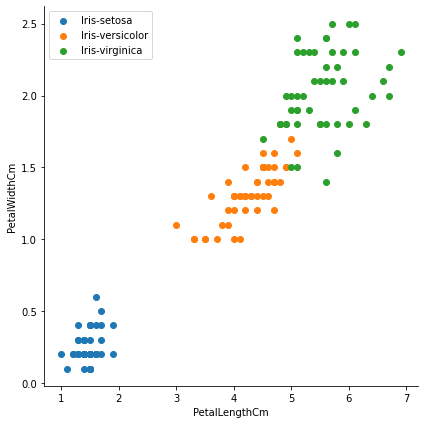

In [118]:
#plotting the dataset(PetalWidth vs PetalLength)

sns.FacetGrid(df,hue="Species",height=6).map(plt.scatter,'PetalLengthCm','PetalWidthCm')
plt.legend(loc='upper left')
plt.show()

#Preprocessing

In [119]:
df['Species'].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [120]:
#Encoding the dataset, replace Species names with numerical values

df['Species']=df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [121]:
df['Species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [122]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


#Divide Data into Input andOutput

In [123]:
#Splitting the dataset in independent and dependent variables
#input x are called features
#output y are called labels/targets

x=df.iloc[:,1:5].values
y=df.iloc[:,5].values

In [124]:
x.shape

(150, 4)

#Train and test Variables

In [125]:
#splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [126]:
x_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [127]:
x_test.shape

(38, 4)

#Scaling or Normalizing The Data

In [128]:
#Feature Scaling to bring the variable in a single scale

from sklearn.preprocessing import StandardScaler

In [129]:
sc = StandardScaler() 

#Scaling the data (inputs only)

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [130]:
x_test

array([[ 0.12564197, -0.6117992 ,  0.88098019,  1.81979323],
       [ 0.42404164, -2.0207913 ,  0.21386113, -0.1846167 ],
       [-0.32195754,  2.67584903, -1.36296573, -1.32999381],
       [ 2.36363949, -0.37696718,  1.60874643,  0.9607604 ],
       [-1.06795671,  0.7971929 , -1.30231854, -1.32999381],
       [ 0.87164114,  0.56236088,  1.42680487,  1.96296536],
       [-1.06795671,  1.03202491, -1.42361291, -1.18682167],
       [ 1.46844048,  0.09269685,  0.63839144,  0.53124399],
       [ 1.61764032, -0.6117992 ,  0.69903863,  0.38807185],
       [ 0.57324147, -0.6117992 ,  0.21386113,  0.24489971],
       [ 0.57324147, -1.08146323,  1.18421612,  0.38807185],
       [ 1.02084098,  0.32752887,  0.51709707,  0.53124399],
       [ 0.57324147, -0.6117992 ,  0.63839144,  0.10172757],
       [ 1.17004081, -0.6117992 ,  0.57774425,  0.53124399],
       [ 0.57324147, -0.37696718,  0.63839144,  0.38807185],
       [-1.21715655,  0.09269685, -1.30231854, -1.47316594],
       [ 0.42404164, -0.

#Run a Classifier

###USING Linear KERNEL

In [131]:
#importing support vector classifier(svc) from svm library

from sklearn.svm import SVC

In [132]:
svc=SVC(kernel='linear', C=1.0, random_state= 0)

#Fitting SVC Classification to training set with linear kernel

svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [133]:
svc.predict([[5,1.5,0.7,2]])

array([2])

Predicting From The Trained Model

In [134]:
#predicting the Test set results

pred_y=svc.predict(x_test)

In [135]:
pred_y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2])

In [136]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [138]:
#making confusion matrix

confusion_matrix(y_test,pred_y)

array([[13,  0,  0],
       [ 0, 13,  3],
       [ 0,  0,  9]])

In [139]:
#finding accuracy

ac = accuracy_score(y_test,pred_y)

In [140]:
ac

0.9210526315789473

In [141]:
from sklearn.metrics import classification_report

In [142]:
#Getting classification report

cls_report=classification_report(pred_y,y_test)

In [143]:
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



###USING Radial Basis Function KERNEL

In [144]:
#importing support vector classifier(svc) from svm library

from sklearn.svm import SVC

In [145]:
classifier=SVC(kernel='rbf',random_state=0, C=1.0)

# Fitting SVC Classification to the Training set with rbf kernel

classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Predicting From The Trained Model

In [146]:
#Predicting the Test Set Results

pred_y=classifier.predict(x_test)

In [147]:
pred_y

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [148]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [150]:
#Making Confusion Matrix

confusion_matrix(y_test,pred_y)

array([[13,  0,  0],
       [ 0, 12,  4],
       [ 0,  0,  9]])

In [151]:
#Finding Accuracy

aa = accuracy_score(y_test,pred_y)

In [152]:
aa

0.8947368421052632

In [153]:
#Getting Classification report

from sklearn.metrics import confusion_matrix

clas_report=classification_report(y_test,pred_y)

In [154]:
print(clas_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.75      0.86        16
           2       0.69      1.00      0.82         9

    accuracy                           0.89        38
   macro avg       0.90      0.92      0.89        38
weighted avg       0.93      0.89      0.90        38



###USING polynomial KERNEL

In [155]:
#importing support vector classifier(svc) from svm library

from sklearn.svm import SVC

In [156]:
classifier=SVC(kernel='poly',random_state=0, C=1.0)

# Fitting SVC Classification to the Training set with rbf kernel

classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Predicting From The Trained Model

In [157]:
#Predicting the Test Set Results

pred_y=classifier.predict(x_test)

In [158]:
pred_y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [159]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [160]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [161]:
#Making Confusion Matrix

confusion_matrix(y_test,pred_y)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [162]:
#Finding Accuracy

Acc = accuracy_score(y_test,pred_y)

In [163]:
Acc

0.9736842105263158

In [164]:
 #Getting Classification report

from sklearn.metrics import confusion_matrix

clss_report=classification_report(y_test,pred_y)

In [165]:
print(clss_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#Conclusion

In [166]:
print('Accuracy of the SVC Clasification with Linear kernel:',ac)

Accuracy of the SVC Clasification with Linear kernel: 0.9210526315789473


In [167]:
print('Accuracy of the SVC Clasification with Radial Basis Function kernel:',aa)

Accuracy of the SVC Clasification with Radial Basis Function kernel: 0.8947368421052632


In [168]:
print('Accuracy of the SVC Clasification with Polynomial kernel:',Acc)

Accuracy of the SVC Clasification with Polynomial kernel: 0.9736842105263158
